<a href="https://colab.research.google.com/github/NataliaKolesnik/IT_volunteer/blob/master/%D0%A1%D1%82%D0%B0%D1%80%D1%82%D0%BE%D0%B2%D1%8B%D0%B9_%D0%B0%D0%BD%D0%B0%D0%BB%D0%B8%D0%B7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
pd.set_option('display.float_format', '{:.2f}'.format)

FONT_TITLE = 20
FONT_LABEL = 15

path_data = '/content/drive/MyDrive/it_volonter/data/'

In [4]:
# Загружаем данные
df_m = pd.read_excel(path_data+'Выборка компаний Москва.xlsx', sheet_name='report', header=3)
df_r = pd.read_excel(path_data+'Организации кроме Москвы.xlsx', sheet_name='report', header=3)

In [5]:
# Объединим в один датасет
df = pd.concat([df_m, df_r], axis=0, ignore_index=True)

In [6]:
# Удалим колонку №
df = df.drop('№', axis=1)

In [7]:
# Пропуски в регистрацонных данных
df.isna().sum()[:10]

Наименование                      0
Регистрационный номер            10
Дата регистрации                  0
Статус                            0
Код налогоплательщика             7
Регион регистрации                0
Код ОКАТО                         0
Наименование ОКАТО                0
Код ОКТМО                        22
Организационно-правовая форма     0
dtype: int64

## Регистрационный номер

In [8]:
df[df['Регистрационный номер'].isna()]

,Наименование,Регистрационный номер,Дата регистрации,Статус,Код налогоплательщика,Регион регистрации,Код ОКАТО,Наименование ОКАТО,Код ОКТМО,Организационно-правовая форма,...,"2017, Всего использовано средств, RUB","2018, Всего использовано средств, RUB","2019, Всего использовано средств, RUB","2020, Всего использовано средств, RUB","2021, Всего использовано средств, RUB","2017, Остаток средств на конец отчетного года, RUB","2018, Остаток средств на конец отчетного года, RUB","2019, Остаток средств на конец отчетного года, RUB","2020, Остаток средств на конец отчетного года, RUB","2021, Остаток средств на конец отчетного года, RUB"
1894,МФБД,NaN,1991-10-22 00:00:00,Действующая,7714041365.00,Москва,45277586000,"Москва, Северный, Савеловский",45344000000.00,Общественные фонды,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2734,"РСУ, ППО",NaN,1996-01-29 00:00:00,Действующая,NaN,Москва,45286580000,"Москва, Центральный, Таганский",45381000000.00,Общественные фонды,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3689,АГРЫЗСКИЙ РЕМОНТНО-СТРОИТЕЛЬНЫЙ УЧАСТОК,NaN,1993-12-03 00:00:00,Действующая,1601001554.00,Республика Татарстан,92201501000,"Республика Татарстан, Агрызский район, Агрыз",92601101001.00,Благотворительные фонды,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3746,АЛЕКСЕЕВСКИЙ УЧАСТОК СТРОИТЕЛЬСТВА ЖИЛИЩ,NaN,1993-12-24 00:00:00,Действующая,1605000738.00,Республика Татарстан,92206551000,"Республика Татарстан, Алексеевский район, Алек...",92606151051.00,Благотворительные фонды,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5234,"ВРЕМЯ, КООП",NaN,1989-03-15 00:00:00,Действующая,5446100298.00,Новосибирская область,50412000000,"Новосибирская область, Искитим",50712000001.00,Благотворительные фонды,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5349,"ГИДРОДОРМОСТ, МУП",NaN,1992-06-02 00:00:00,Действующая,7303003998.00,Ульяновская область,73401365000,"Ульяновская область, Ульяновск, Железнодорожный",73701000001.00,Благотворительные фонды,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8774,"ПСКОВЛЕСТОППРОМ, ФЛ ВЕЛИКОЛУКСКИЙ ГОРТОПСБЫТ ОАО",NaN,1993-09-02 00:00:00,Действующая,6025001078.00,Псковская область,58410000000,"Псковская область, Великие Луки",58710000001.00,Благотворительные фонды,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9503,"СЕВЕРСКАГРОПРОМХИМИЯ, АООТ",NaN,1993-03-04 00:00:00,Действующая,2348004449.00,Краснодарский край,3243813001,"Краснодарский край, Северский район, Северский...",3643413101.00,Благотворительные фонды,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9908,"СОРИКС, ТОО СП",NaN,1992-09-29 00:00:00,Действующая,5024012244.00,Московская область,46223501000,"Московская область, Красногорский район, Красн...",46623101001.00,Благотворительные фонды,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10433,"УСПЕНСКОЕ, ГУП ДОМ ОТДЫХА",NaN,1993-12-14 00:00:00,Действующая,5032021436.00,Московская область,46455000217,"Московская область, Одинцово, п дома отдыха ""У...",46755000317.00,Благотворительные фонды,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# По ИНН  базе егрюл выдается 'По заданным критериям поиска данных не найдено'. 
# Данных по годам по ним нет. 
df[df['Регистрационный номер'].isna()].isna().sum().value_counts()

10    151
0       9
1       1
dtype: int64

In [10]:
# Удалим эти организации.
df = df.drop(df[df['Регистрационный номер'].isna()].index, axis=0)

# Регистрационный номер и Код налогоплательщика преобразуем в формат int
df['Регистрационный номер'] = df['Регистрационный номер'].astype(int)
df['Код налогоплательщика'] = df['Код налогоплательщика'].apply(lambda i: i if pd.isna(i) else int(i))

## Дата создания организации

In [11]:
# У НО БФ "ЖАРПТИЦА" дата регистрации - 01.03.2001 с сайта ЕГРЮЛ, а не 1899-12-30  
display(df[df['Регистрационный номер']==1037739450891][['Наименование', 'Дата регистрации']])

# Заменим на верную дату
df['Дата регистрации'].loc[1185] = pd.to_datetime('01.03.2001', format='%d.%m.%Y')

# Проверим
display(df[df['Регистрационный номер']==1037739450891][['Наименование', 'Дата регистрации']])

,Наименование,Дата регистрации
1185,"ЖАР-ПТИЦА, ФОНД",30.12.1899


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,Наименование,Дата регистрации
1185,"ЖАР-ПТИЦА, ФОНД",2001-03-01 00:00:00


In [12]:
# Сформируем новый признак - год регистрации
df['Год_регистрации'] = df['Дата регистрации'].apply(lambda d: d.year)

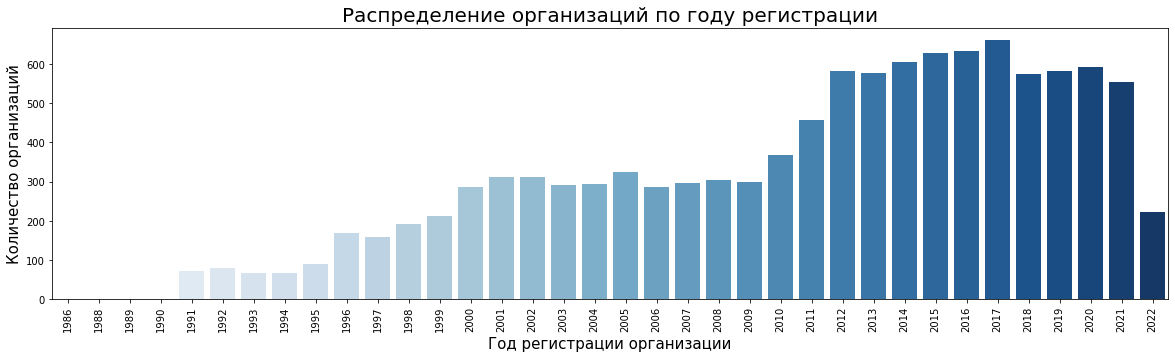

In [13]:
plt.figure(figsize=(20,5))
plt.title('Распределение организаций по году регистрации', fontsize=FONT_TITLE)
sns.countplot(x=df['Год_регистрации'],  palette='Blues')
plt.ylabel('Количество организаций', fontsize=FONT_LABEL)
plt.xlabel('Год регистрации организации', fontsize=FONT_LABEL)
plt.xticks(rotation=90)
plt.show()

По графику видно, что резкий рост количества регистраций благотворительных НКО был в 1996, 2000 и 2010-2012

In [14]:
df['Статус'].value_counts()

Действующая       11154
Реорганизуется        6
Ликвидируется         2
Name: Статус, dtype: int64

## Регион регистрации

In [15]:
df['Регион регистрации'].value_counts(normalize=True)

Москва                         0.33
Московская область             0.06
Санкт-Петербург                0.06
Республика Татарстан           0.03
Башкортостан (Республика)      0.03
                               ... 
Чеченская Республика           0.00
Магаданская область            0.00
Чукотский автономный округ     0.00
Еврейская автономная область   0.00
Байконур                       0.00
Name: Регион регистрации, Length: 83, dtype: float64

In [16]:
df['Регион регистрации'].value_counts()

Москва                          3645
Московская область               702
Санкт-Петербург                  664
Республика Татарстан             317
Башкортостан (Республика)        284
                                ... 
Чеченская Республика              11
Магаданская область                6
Чукотский автономный округ         2
Еврейская автономная область       2
Байконур                           1
Name: Регион регистрации, Length: 83, dtype: int64

В выборке представлено 83 региона. 

1/3 часть организаций зарегистрирована в Москве. По 6% от представленного количества в МО и Санкт-Петербурге. Далее по нисходящей. Есть и такие регионы, в которых зарегистрировано всего несколько НО. 

## Анализ пропусков в данных

Есть организации, которые не подали никаких сведений за весь период с 2017 по 2021 год. Сведения о деятельности фондов содержатся в столбцах с 11 по 160. Удалим строки с данными этих организация (по условию, что все ячейки в столбцах 11-160 пустые)

In [17]:
#количество фондов в таблице на текущий момент
df.shape

(11162, 162)

In [18]:
df.dropna(subset=list(df.columns[11:161]),how='all', inplace=True)

In [19]:
df.shape

(6838, 162)

Из представленных в исходных данных более чем 11 тыс. фондов финансовую отчетность за 2017-2021 предоставляли лишь 6838 организаций. В дальнейшем будем анализировать только их.

Также в таблице имеются пустые столбцы (доля пропусков -100%)

In [26]:
#выводим список пустых столбцов
df_null_percent=df.isnull().mean()*100
df_null_percent[df_null_percent==100]

2019, Среднесписочная численность работников   100.00
2020, Среднесписочная численность работников   100.00
2021, Среднесписочная численность работников   100.00
2017, Доходы, RUB                              100.00
2018, Доходы, RUB                              100.00
2019, Доходы, RUB                              100.00
2020, Доходы, RUB                              100.00
2021, Доходы, RUB                              100.00
2017, Расходы, RUB                             100.00
2018, Расходы, RUB                             100.00
2019, Расходы, RUB                             100.00
2020, Расходы, RUB                             100.00
2021, Расходы, RUB                             100.00
dtype: float64

Некоммерческие организации создаются и действуют для достижения общественно полезных целей: социальных, благотворительных, культурных, образовательных, научных и управленческих. Получение доходов не является ее основной деятельнотью, а живет НКО за счет взносов, пожертвований и пр. Поэтому колонки Доходов и расходов пустые. Их можно исключить из датасета.

По спреднесписочной численности - скорее всего просто нет данных (не выгрузились). Так как у организации есть минимум один человек - ее руководитель.

Одной из поставленных задач является: 'Для тех организаций, которые подали отчетность, узнать, есть ли связь между материальным благополучием фонда и количеством штатных работников". Необходимо узнать возможность получения этих данных.

In [27]:
col_drop = ['2017, Доходы, RUB',  '2018, Доходы, RUB',  '2019, Доходы, RUB',  '2020, Доходы, RUB',  '2021, Доходы, RUB',
            '2017, Расходы, RUB', '2018, Расходы, RUB', '2019, Расходы, RUB', '2020, Расходы, RUB', '2021, Расходы, RUB']

df = df.drop(col_drop, axis=1)

## Данные по отчетности

**Данные за 2017-2021 года, которые представленны в выборке:**
- Среднесписочная численность работников,
- Доходы, RUB, - удалили, так как пустые  
- Расходы, RUB, - удалили, так как пустые   
- Дебиторская задолженность, RUB,
- Денежные средства и денежные эквиваленты, RUB,
- Капитал и резервы, RUB,
- Заёмные средства (краткосрочные), RUB,
- Кредиторская задолженность, RUB,
- Пассивы всего, RUB,
- Выручка, RUB,
- Себестоимость продаж, RUB,
- Валовая прибыль (убыток), RUB,
- Коммерческие расходы, RUB,
- Управленческие расходы, RUB,
- Прибыль (убыток) от продажи, RUB,
- Доходы от участия в других организациях, RUB,
- Проценты к получению, RUB,
- Проценты к уплате, RUB,
- Прочие доходы, RUB,
- Прочие расходы, RUB,
- Прибыль (убыток) до налогообложения , RUB,
- Текущий налог на прибыль, RUB,
- Чистая прибыль (убыток), RUB,
- Прибыль от приносящей доход деятельности, RUB,
- Всего поступило средств, RUB,
- Расходы на целевые мероприятия, RUB,
- Расходы на содержание аппарата управления, RUB,
- Приобретение основных средств, инвентаря и иного имущества, RUB,
- Всего использовано средств, RUB,
- Остаток средств на конец отчетного года, RUB,

In [28]:
otch_col = ['Среднесписочная численность работников', 'Дебиторская задолженность, RUB', 'Денежные средства и денежные эквиваленты, RUB',
            'Капитал и резервы, RUB', 'Заёмные средства (краткосрочные), RUB', 'Кредиторская задолженность, RUB', 'Пассивы всего, RUB', 'Выручка, RUB', 'Себестоимость продаж, RUB',
            'Валовая прибыль (убыток), RUB', 'Коммерческие расходы, RUB', 'Управленческие расходы, RUB', 'Прибыль (убыток) от продажи, RUB', 'Доходы от участия в других организациях, RUB',
            'Проценты к получению, RUB', 'Проценты к уплате, RUB', 'Прочие доходы, RUB', 'Прочие расходы, RUB', 'Прибыль (убыток) до налогообложения , RUB',
            'Текущий налог на прибыль, RUB', 'Чистая прибыль (убыток), RUB', 'Прибыль от приносящей доход деятельности, RUB', 'Всего поступило средств, RUB', 'Расходы на целевые мероприятия, RUB',
            'Расходы на содержание аппарата управления, RUB', 'Приобретение основных средств, инвентаря и иного имущества, RUB', 'Всего использовано средств, RUB', 'Остаток средств на конец отчетного года, RUB']

Посмотрим какие организации не сдавали отчетнсоть в контролирующие органы, чтоб в дальнейшем их исключить из анализа.

У нас есть оганизации, которые зарегистрированы в 2022 году. И соответсственно отчетности у них не будет.

И так же много организаций зарегистрировано с 2018 по 2021 - значит отчетность должна быть только за период.


### 2017 год

In [29]:
col_2017 = ['2017, ' + el for el in otch_col]
df_2017 = df[df['Год_регистрации'] <= 2017][['Регистрационный номер']+col_2017]
print('Организации, обязанные сдать отчет в 2017 году:', df_2017.shape[0], '\n')
df_2017.info()

Организации, обязанные сдать отчет в 2017 году: 5696 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5696 entries, 1 to 11166
Data columns (total 29 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Регистрационный номер                                                  5696 non-null   int64  
 1   2017, Среднесписочная численность работников                           2613 non-null   object 
 2   2017, Дебиторская задолженность, RUB                                   2210 non-null   float64
 3   2017, Денежные средства и денежные эквиваленты, RUB                    3565 non-null   float64
 4   2017, Капитал и резервы, RUB                                           3428 non-null   float64
 5   2017, Заёмные средства (краткосрочные), RUB                            382 non-null    float64
 6   2017, Кредиторская задолженность

### 2018 год

In [32]:
col_2018 = ['2018, ' + el for el in otch_col]
df_2018 = df[df['Год_регистрации'] <= 2018][col_2018]
print('Организации, обязанные сдать отчет в 2018 году:', df_2018.shape[0], '\n')
df_2018.info()

Организации, обязанные сдать отчет в 2018 году: 6042 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6042 entries, 1 to 11170
Data columns (total 28 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   2018, Среднесписочная численность работников                           54 non-null     object 
 1   2018, Дебиторская задолженность, RUB                                   2460 non-null   float64
 2   2018, Денежные средства и денежные эквиваленты, RUB                    3874 non-null   float64
 3   2018, Капитал и резервы, RUB                                           3789 non-null   float64
 4   2018, Заёмные средства (краткосрочные), RUB                            397 non-null    float64
 5   2018, Кредиторская задолженность, RUB                                  2356 non-null   float64
 6   2018, Пассивы всего, RUB        

### 2019 год

In [33]:
col_2019 = ['2019, ' + el for el in otch_col]
df_2019 = df[df['Год_регистрации'] <= 2019][col_2019]
print('Организации, обязанные сдать отчет в 2019 году:', df_2019.shape[0], '\n')
df_2019.info()

Организации, обязанные сдать отчет в 2019 году: 6370 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6370 entries, 1 to 11170
Data columns (total 28 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   2019, Среднесписочная численность работников                           0 non-null      float64
 1   2019, Дебиторская задолженность, RUB                                   2651 non-null   float64
 2   2019, Денежные средства и денежные эквиваленты, RUB                    4166 non-null   float64
 3   2019, Капитал и резервы, RUB                                           3038 non-null   float64
 4   2019, Заёмные средства (краткосрочные), RUB                            410 non-null    float64
 5   2019, Кредиторская задолженность, RUB                                  2499 non-null   float64
 6   2019, Пассивы всего, RUB        

### 2020 год

In [34]:
col_2020 = ['2020, ' + el for el in otch_col]
df_2020 = df[df['Год_регистрации'] <= 2020][col_2019]
print('Организации, обязанные сдать отчет в 2020 году:', df_2020.shape[0], '\n')
df_2020.info()

Организации, обязанные сдать отчет в 2020 году: 6697 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6697 entries, 1 to 11171
Data columns (total 28 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   2019, Среднесписочная численность работников                           0 non-null      float64
 1   2019, Дебиторская задолженность, RUB                                   2651 non-null   float64
 2   2019, Денежные средства и денежные эквиваленты, RUB                    4166 non-null   float64
 3   2019, Капитал и резервы, RUB                                           3038 non-null   float64
 4   2019, Заёмные средства (краткосрочные), RUB                            410 non-null    float64
 5   2019, Кредиторская задолженность, RUB                                  2499 non-null   float64
 6   2019, Пассивы всего, RUB        

### 2021 год

In [35]:
col_2021 = ['2021, ' + el for el in otch_col]
df_2021 = df[df['Год_регистрации'] <= 2021][col_2019]
print('Организации, обязанные сдать отчет в 2021 году:', df_2021.shape[0], '\n')
df_2021.info()

Организации, обязанные сдать отчет в 2021 году: 6838 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6838 entries, 1 to 11171
Data columns (total 28 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   2019, Среднесписочная численность работников                           0 non-null      float64
 1   2019, Дебиторская задолженность, RUB                                   2651 non-null   float64
 2   2019, Денежные средства и денежные эквиваленты, RUB                    4166 non-null   float64
 3   2019, Капитал и резервы, RUB                                           3038 non-null   float64
 4   2019, Заёмные средства (краткосрочные), RUB                            410 non-null    float64
 5   2019, Кредиторская задолженность, RUB                                  2499 non-null   float64
 6   2019, Пассивы всего, RUB        

In [ ]:
df_m.iloc[1185]

In [ ]:
3647

In [ ]:
df_m['Год_регистрации'] = 